In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
plt.style.use("fivethirtyeight")

In [2]:
churn_data = pd.read_csv('/home/elliot/PycharmProjects/CSC 495 - Telecom Customer Churn/Datasets/telecom_churn_Processed.csv')

X = churn_data.drop('Churn', axis=1)
y = churn_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 42)

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [3]:
xg = XGBClassifier()
xg.fit(X_train_sc, y_train)

y_pred_xg = xg.predict(X_test_sc)

y_pred_xg_train = xg.predict(X_train_sc)

xg_as = metrics.accuracy_score(y_test, y_pred_xg)
xg_as_train = metrics.accuracy_score(y_train, y_pred_xg_train)

print(f"Accuracy score of test data : {xg_as}")
print(f"Accuracy score of train data : {xg_as_train}")


/home/elliot/anaconda3/envs/CSC495_Telecom_Churn/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:33:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score of test data : 0.7811288237828522
Accuracy score of train data : 0.9828061982593929


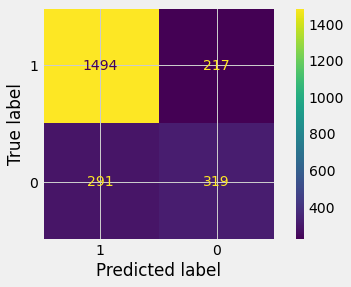

In [4]:
metrics.plot_confusion_matrix(xg, X_test_sc, y_test, display_labels= [1, 0]);


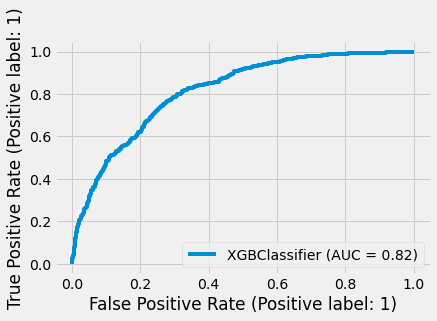

In [5]:
metrics.plot_roc_curve(xg, X_test_sc, y_test);


In [6]:
parameters = {'learning_rate' : [0.01, 0.03, 0.05], 'max_depth' : [1, 4, 6], 'n_estimators' : [100, 300, 400, 600]}


In [7]:
xg_grid = GridSearchCV(XGBClassifier(), parameters, cv = 5)


In [8]:
xg_gridcv =XGBClassifier(learning_rate = .05, max_depth = 1, n_estimators = 600)

xg_gridcv.fit(X_train_sc, y_train)

y_pred_xggrid = xg_gridcv.predict(X_test_sc)
y_pred_xggrid_train = xg_gridcv.predict(X_train_sc)

xg_as_grid = metrics.accuracy_score(y_test, y_pred_xggrid)
xg_as_grid_train = metrics.accuracy_score(y_train, y_pred_xggrid_train)

print(f"Accuracy score of test data : {xg_as_grid}")
print(f"Accuracy score of train data : {xg_as_grid_train}")


/home/elliot/anaconda3/envs/CSC495_Telecom_Churn/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:33:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score of test data : 0.8069797501077122
Accuracy score of train data : 0.8104436425387391


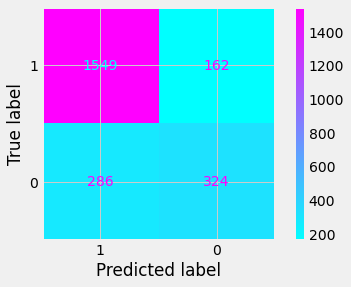

In [9]:
metrics.plot_confusion_matrix(xg_gridcv, X_test_sc, y_test, cmap = 'cool', display_labels = [1, 0]);


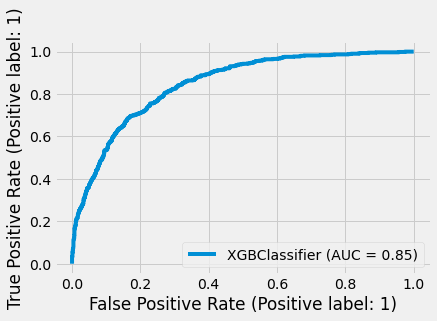

In [10]:
metrics.plot_roc_curve(xg_gridcv, X_test_sc, y_test);
